In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection ,preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
data_train = pd.read_csv(r"C:\Users\compaq\Desktop\nikhil's material\[CN] Machine Learning\12. Project - Logistic Regression\train.csv")
data_test = pd.read_csv(r"C:\Users\compaq\Desktop\nikhil's material\[CN] Machine Learning\12. Project - Logistic Regression\test.csv")

In [179]:
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


## Data Processing and Cleaning

In [180]:
data_train.drop(["Name","Ticket"],axis = 1,inplace =True)

In [181]:
def males(g):
    if g == "male":
        return 1
    else:
        return 0
    
def females(g):
    if g == "female":
        return 1
    else:
        return 0

In [182]:
data_train["Male"] = data_train["Sex"].apply(males)
data_train["Female"] = data_train["Sex"].apply(females)

In [183]:
data_train.drop("Sex",axis = 1,inplace = True)
data_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male,Female
0,2,29.0,1,0,26.000,NaN,S,1,0,1
1,3,NaN,0,0,8.050,NaN,S,0,1,0
2,2,39.0,0,0,26.000,NaN,S,0,1,0
3,3,29.0,0,4,21.075,NaN,S,0,0,1
4,3,25.0,0,0,7.050,NaN,S,0,1,0


In [184]:
data_train.isnull().sum()

Pclass        0
Age         132
SibSp         0
Parch         0
Fare          0
Cabin       514
Embarked      1
Survived      0
Male          0
Female        0
dtype: int64

In [185]:
def cherbourg(s):
    if s=="C":
        return 1
    else:
        return 0

def queenstown(s):
    if s=="Q":
        return 1
    else:
        return 0
    
def southamptom(s):
    if s=="S":
        return 1
    else:
        return 0
    


In [186]:
data_train["Cherboung"] = data_train.Embarked.apply(cherbourg)
data_train["Queenstown"] = data_train.Embarked.apply(queenstown)
data_train["Southamptom"] = data_train.Embarked.apply(southamptom)

data_train.drop("Embarked",axis =1,inplace = True)
data_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherboung,Queenstown,Southamptom
0,2,29.0,1,0,26.000,NaN,1,0,1,0,0,1
1,3,NaN,0,0,8.050,NaN,0,1,0,0,0,1
2,2,39.0,0,0,26.000,NaN,0,1,0,0,0,1
3,3,29.0,0,4,21.075,NaN,0,0,1,0,0,1
4,3,25.0,0,0,7.050,NaN,0,1,0,0,0,1


In [187]:
def cabin(x):
    if x is np.nan:
        return 0
    else:
        return 1

In [188]:
data_train["Cabin"] = data_train.Cabin.apply(cabin)

In [189]:
data_train["Age"].fillna(data_train["Age"].mean(),inplace= True)

In [190]:
data_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherboung,Queenstown,Southamptom
0,2,29.00000,1,0,26.000,0,1,0,1,0,0,1
1,3,29.70056,0,0,8.050,0,0,1,0,0,0,1
2,2,39.00000,0,0,26.000,0,0,1,0,0,0,1
3,3,29.00000,0,4,21.075,0,0,0,1,0,0,1
4,3,25.00000,0,0,7.050,0,0,1,0,0,0,1


In [191]:
data_train.isnull().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Survived       0
Male           0
Female         0
Cherboung      0
Queenstown     0
Southamptom    0
dtype: int64

In [192]:
data_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherboung,Queenstown,Southamptom
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.230539,0.402695,0.639222,0.360778,0.199102,0.074850,0.724551
std,0.831638,12.753571,1.080327,0.854695,45.320835,0.421493,0.490808,0.480586,0.480586,0.399624,0.263347,0.447075
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.700560,0.000000,0.000000,14.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## using Numpy

In [193]:
data = data_train.values

In [194]:
data.shape

(668, 12)

In [195]:
x = data[:,:-1]
y = data[:,-1]

In [196]:
x.shape,y.shape

((668, 11), (668,))

## Scaling

In [197]:
scaler = preprocessing.StandardScaler()

In [198]:
scaler.fit(x)

StandardScaler()

In [199]:
x_scaled = scaler.transform(x)

In [200]:
x_scaled = np.append(x_scaled,np.ones(x_scaled.shape[0]).reshape(-1,1),axis =1)

## Train Code - predict() , fit() functions

In [201]:
def sigmoid(agg):
    return 1/(1+np.exp(-agg))

def cost(x_train,y_train,m):
    
    cost_ = 0
    N =x_train.shape[0]
    for i in range(N):
        agg = (x_train[i]*m).sum()
        h = sigmoid(agg)
        cost = -y_train[i]*np.log(h) - (1 - y_train[i])*np.log(1 - h)
        cost_ +=cost
    return cost_

def step_gradient(x_train,y_train,lrate,m):
    
    N= x_train.shape[0]
    slope_m = np.zeros(x_train.shape[1])
    for i in range(N):
        agg = (x_train[i]*m).sum()
        h =sigmoid(agg)
        slope_m += (-1/N)*(y_train[i]-h)*x_train[i]
        
    m =m - lrate*slope_m
    return m 

def fit(x_train,y_train,epochs =100,lrate = 0.01):
    m =np.zeros(x_train.shape[1])
    cost_array =[]
    unit = epochs/100
    for i in range(epochs):
        m = step_gradient(x_train,y_train,lrate,m)
        cost_ = cost(x_train ,y_train,m)
        cost_array.append(cost_)
        
        if i%unit == 0:
            print("Epoch:{}, cost:{}".format(i,cost_))
            
    return m,cost_array

def predict(x_test,m):
    
    y_pred = []
    N = x_test.shape[0]
    
    for i in range(N):
        agg = (x_test[i]*m).sum()
        h =sigmoid(agg)
        
        if h >0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
        return np.array(y_pred)
    
def accuracy(x_test,y_pred):
    
    correct = 0
    N =x_test.shape[0]
    correct = (x_test==y_pred).sum()
    
    return (correct/N)*100

In [224]:
m, cost_array = fit(x_scaled,y,4000,1)
print(m)

Epoch:0, cost:323.3417089303934
Epoch:40, cost:22.116318291164163
Epoch:80, cost:13.400297426765453
Epoch:120, cost:10.526044992844373
Epoch:160, cost:9.099938709632225
Epoch:200, cost:8.243783767499185
Epoch:240, cost:7.66861615872247
Epoch:280, cost:7.252390195251821
Epoch:320, cost:6.934912519047663
Epoch:360, cost:6.683131163690605
Epoch:400, cost:6.477397430480708
Epoch:440, cost:6.305290928978491
Epoch:480, cost:6.158566346488404
Epoch:520, cost:6.031526709288477
Epoch:560, cost:5.920102746303371
Epoch:600, cost:5.8213051820924875
Epoch:640, cost:5.732884890500643
Epoch:680, cost:5.653114303132857
Epoch:720, cost:5.5806423703332575
Epoch:760, cost:5.514395677892935
Epoch:800, cost:5.453509401108663
Epoch:840, cost:5.3972780602803745
Epoch:880, cost:5.345119727943871
Epoch:920, cost:5.296549567453636
Epoch:960, cost:5.251159967743415
Epoch:1000, cost:5.2086054210170945
Epoch:1040, cost:5.168590864115394
Epoch:1080, cost:5.130862585429473
Epoch:1120, cost:5.095201056957117
Epoch:11

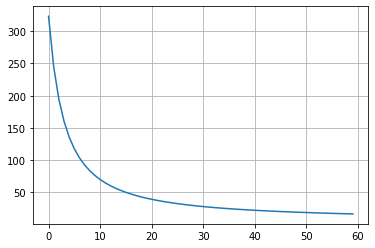

In [203]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [204]:
y_pred_train = predict(x_scaled,m) 

In [205]:
accuracy(y,y_pred_train)

72.45508982035929

## Loading testing data and applying preprocesssing and cleaning 

In [206]:
data_test.drop(["Name","Ticket"],axis =1,inplace =True)

In [207]:
def males(s):
    if s == "male":
        return 1
    else:
        return 0

In [208]:
def females(s):
    if s == "female":
        return 1
    else:
        return 0

In [209]:
data_test["Male"] = data_test["Sex"].apply(males)
data_test["Female"] = data_test["Sex"].apply(females)

In [210]:
data_test.drop(["Sex"],inplace = True,axis =1)

In [211]:
def Queenstown(s):
    if s == 'Q':
        return 1
    else:
        return 0
    
def Cheersbourg(s):
    if s == 'C':
        return 1
    else:
        return 0
    
def Southhamtom(s):
    if s == 'S':
        return 1
    else:
        return 0
    



In [212]:
data_test["Quennstown"] = data_test.Embarked.apply(Queenstown)
data_test["Cheersbourg"] = data_test.Embarked.apply(Cheersbourg)
data_test["Southhamptom"] = data_test.Embarked.apply(Southhamtom)

In [213]:
data_test.drop(["Embarked"],axis =1,inplace =True)

In [214]:
data_test["Age"].fillna(data_test["Age"].mean(),inplace= True)

In [215]:
def cabin(s):
    if s == np.nan:
        return 1
    else:
        return 0

In [216]:
data_test["Cabin"] = data_test.Cabin.apply(cabin)

In [217]:
data_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Quennstown,Cheersbourg,Southhamptom
0,2,8.000000,1,1,36.7500,0,1,0,0,0,1
1,1,49.000000,0,0,25.9292,0,0,1,0,0,1
2,3,29.694775,0,0,7.7375,0,1,0,1,0,0
3,2,24.000000,2,1,27.0000,0,0,1,0,0,1
4,1,36.000000,0,0,26.2875,0,1,0,0,0,1


In [218]:
data_test.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin           0
Male            0
Female          0
Quennstown      0
Cheersbourg     0
Southhamptom    0
dtype: int64

In [219]:
data_test =data_test.values

In [175]:
data_test_scaled =  scaler.transform(data_test)
data_test_scaled.shape

(223, 11)

In [220]:
data_test_scaled = np.append(data_test_scaled,np.ones(data_test_scaled.shape[0]).reshape(-1,1),axis = 1)

## Getting Y Predictions For Test Data

In [ ]:
y_pred_test = predict(data_test_scaled,m)

In [ ]:
np.savetxt('Predictions.csv',y_pred_test)